<a href="https://colab.research.google.com/github/muthonioprah/AutoLib-Dataset-Analysis/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **REAL ESTATE SALE PRICE PREDICTION**

## **Understanding the Context**
Hass Consulting Company is a real estate leader with over 25 years of experience


### **Defining the Question**

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### **Specifying the Question**

Study the factors that affect housing prices.

Create a model that would allow the company to accurately predict the sale of prices

### **Defining the Metric for Success**

Making correct predictions on housing sale prices with the model with the lowest mean squared error





### **How that will be achieved**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Incorporate categorical independent variables into your models.

Check for multicollinearity

Provide a recommendation based on your analysis.

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#preview dataset
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#datset rows and columns
df.shape


(21613, 20)

In [5]:
#checking the datatypes
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#datset descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#dtaset info
df.info

<bound method DataFrame.info of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 co

# **Cleaning**

In [11]:
#checking the columns
columns= df.columns
print(columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
#checking for null records
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null records

In [13]:
#checking for duplicated records
df.duplicated().sum()

3

There are three duplicated records

In [35]:
#dropping duplicates
df.drop_duplicates(keep='first', inplace = True)


In [36]:
df.duplicated().sum()

0

duplicates dropped

In [19]:
#checking fo the unique values in each column
for i in columns:
   print()
   print('unique values in ', i, ':')
   print()
   print(df[i].unique())


unique values in  id :

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]

unique values in  price :

[221900. 538000. 180000. ... 541800. 610685. 402101.]

unique values in  bedrooms :

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]

unique values in  bathrooms :

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

unique values in  sqft_living :

[1180 2570  770 ... 3087 3118 1425]

unique values in  sqft_lot :

[ 5650  7242 10000 ...  5813  2388  1076]

unique values in  floors :

[1.  2.  1.5 3.  2.5 3.5]

unique values in  waterfront :

[0 1]

unique values in  view :

[0 3 4 2 1]

unique values in  condition :

[3 5 4 1 2]

unique values in  grade :

[ 7  6  8 11  9  5 10 12  4  3 13  1]

unique values in  sqft_above :

[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

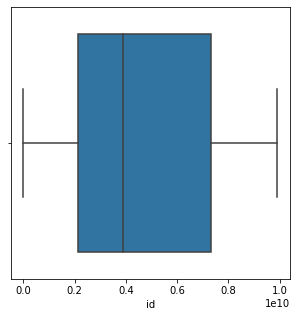

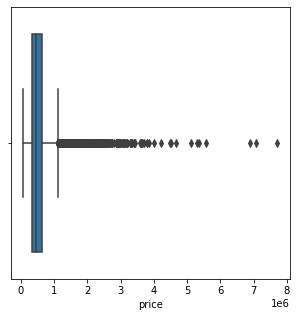

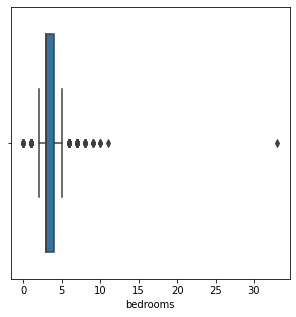

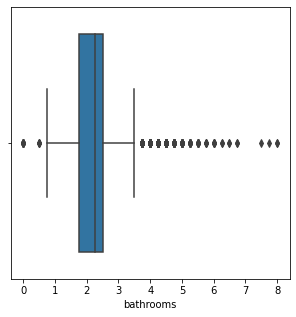

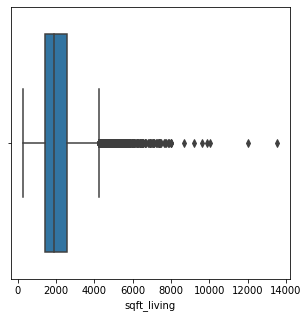

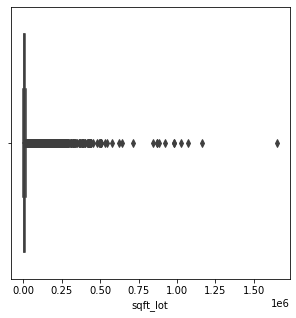

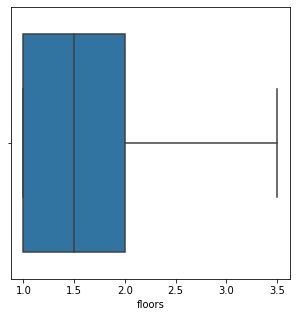

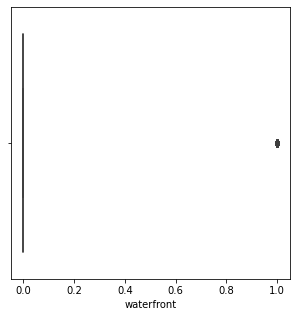

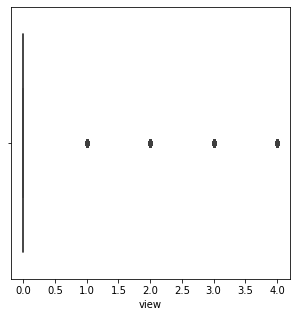

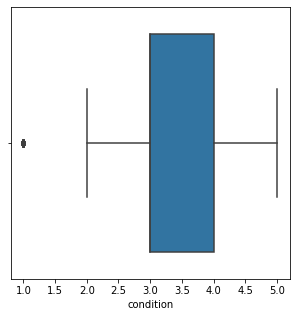

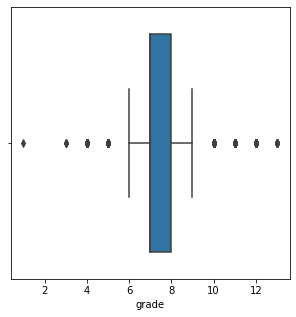

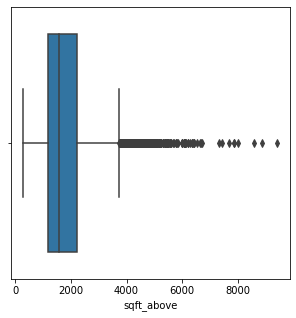

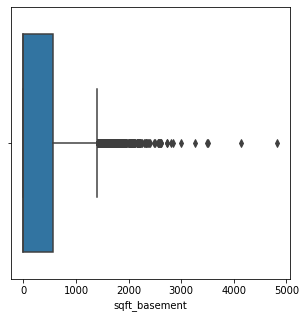

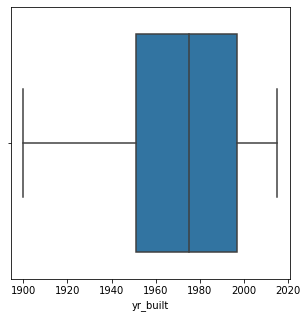

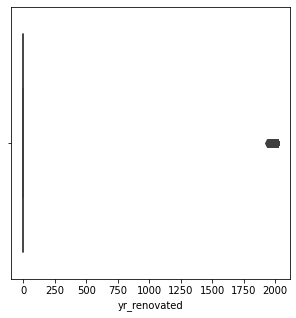

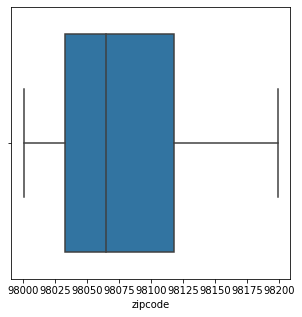

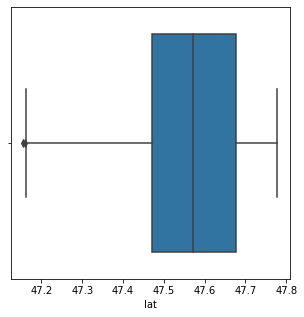

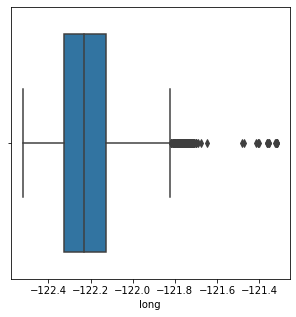

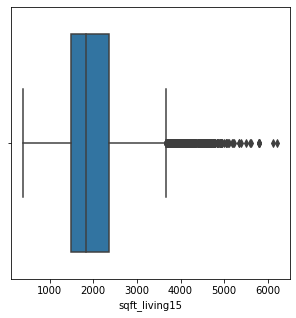

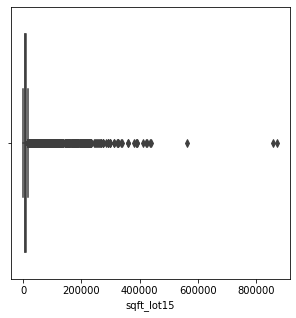

In [30]:
#showing outliers
col = df.columns
for i in col:
  fig = plt.figure(figsize = (5,5))
  sns.boxplot(df[i])
plt.show()

In [37]:
#checking the dataframe new shape
df.shape

(21610, 20)

# **Exploratory Data Analysis**


## **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


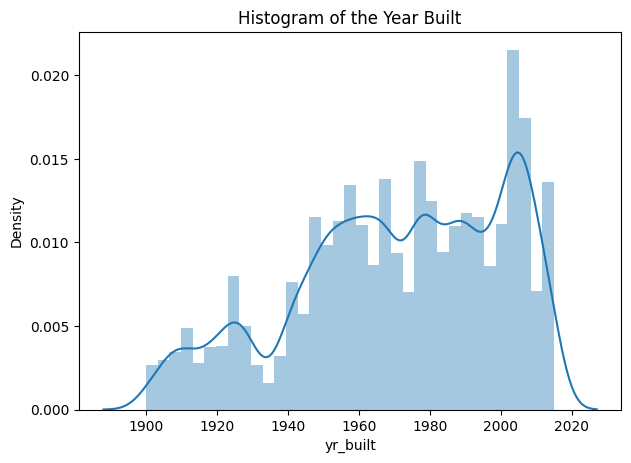

In [38]:
# Histogram of the year when the houses are built
plt.figure(dpi = 100, figsize = (7,5))
sns.distplot(df['yr_built'])
plt.title("Histogram of the Year Built")
plt.show()

Shows the distribution of the years houses were built

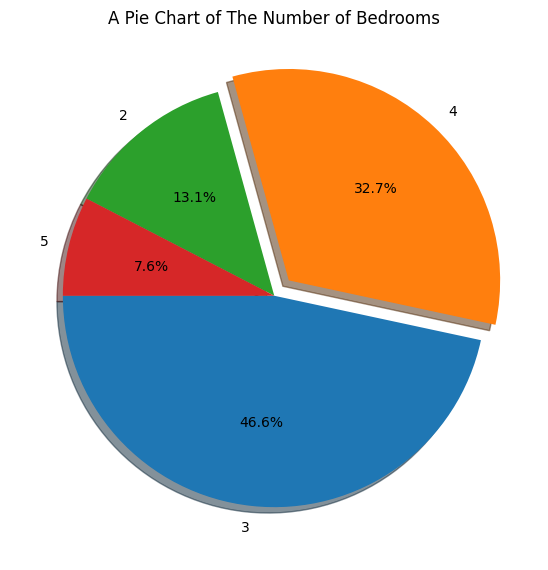

In [46]:
accounts = df['bedrooms'].value_counts().head(4)
labels = accounts.index
values = accounts.values

plt.figure(figsize=(7,7), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1,0,0), shadow=True, startangle=180)
plt.title('A Pie Chart of The Number of Bedrooms', color='black')
plt.show()

Most houses have 3 bedrooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


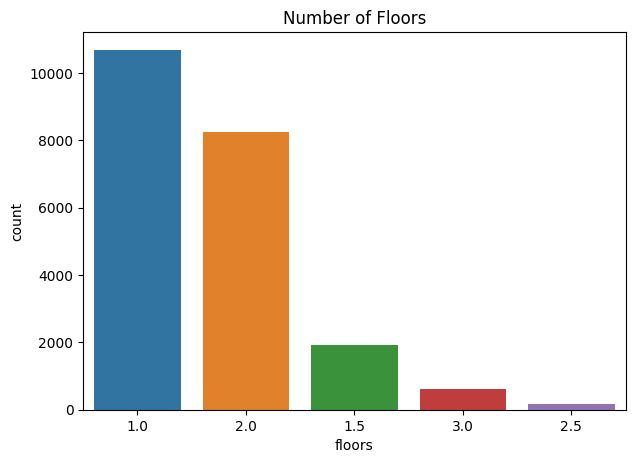

In [43]:
#plotting the numer of floors 
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(df['floors'], order=df['floors'].value_counts().index[:5])
plt.title("Number of Floors")
plt.show()


Most houses had one floor

In [47]:
cool= ['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement','zipcode','sqft_living15', 'sqft_lot15','yr_built', 'yr_renovated' ]
for i in cool:
  print('Frequency table of', i)
  count = df[i].value_counts().head()
  print(count)
  print()

Frequency table of sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
Name: sqft_living, dtype: int64

Frequency table of sqft_lot
5000    358
6000    290
4000    251
7200    220
4800    120
Name: sqft_lot, dtype: int64

Frequency table of sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
Name: sqft_above, dtype: int64

Frequency table of sqft_basement
0      13124
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

Frequency table of zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

Frequency table of sqft_living15
1540    197
1440    195
1560    192
1500    181
1460    169
Name: sqft_living15, dtype: int64

Frequency table of sqft_lot15
5000    427
4000    357
6000    289
7200    211
4800    145
Name: sqft_lot15, dtype: int64

Frequency table of yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
Name: yr_built, dtype: int64

Frequency tabl

Most houses:

1. Were not renovated
2. Were built in 2014
3. Had no basements
4. Were in the 98103  zipcode
5. have 5,000 sqft_lot15
6. Were 5,000 square feet for the lot and 1,300 for living



###**Measures of central Tendancy**

In [56]:
# Checking the mean, median, mode of our dataframe

In [57]:
#mean
for i in col:
  print('The mean of ', i)
  print()
  print(df[i].mean())
  print()

The mean of  id

4580160795.988153

The mean of  price

540178.9448403517

The mean of  bedrooms

3.370846830171217

The mean of  bathrooms

2.114738546968996

The mean of  sqft_living

2079.881212401666

The mean of  sqft_lot

15108.289819527996

The mean of  floors

1.4942387783433595

The mean of  waterfront

0.007542804257288292

The mean of  view

0.23419713095788985

The mean of  condition

3.4094400740397965

The mean of  grade

7.656779268857011

The mean of  sqft_above

1788.3478944932901

The mean of  sqft_basement

291.53331790837575

The mean of  yr_built

1971.0036094400741

The mean of  yr_renovated

84.3223507635354

The mean of  zipcode

98077.9456732994

The mean of  lat

47.56004888940302

The mean of  long

-122.21390976399752

The mean of  sqft_living15

1986.5186950485886

The mean of  sqft_lot15

12769.031975937067



In [55]:
 #median
 for i in col:
  print('The median of ', i)
  print()
  print(df[i].median())
  print()

The median of  id

3904930325.0

The median of  price

450000.0

The median of  bedrooms

3.0

The median of  bathrooms

2.25

The median of  sqft_living

1910.0

The median of  sqft_lot

7619.0

The median of  floors

1.5

The median of  waterfront

0.0

The median of  view

0.0

The median of  condition

3.0

The median of  grade

7.0

The median of  sqft_above

1560.0

The median of  sqft_basement

0.0

The median of  yr_built

1975.0

The median of  yr_renovated

0.0

The median of  zipcode

98065.0

The median of  lat

47.5718

The median of  long

-122.231

The median of  sqft_living15

1840.0

The median of  sqft_lot15

7620.0



In [53]:
#mode
for i in col:
  print('The mode of', i)
  print()
  print(df[i].mode())

The mode of id

0    795000620
dtype: int64
The mode of price

0    350000.0
1    450000.0
dtype: float64
The mode of bedrooms

0    3
dtype: int64
The mode of bathrooms

0    2.5
dtype: float64
The mode of sqft_living

0    1300
dtype: int64
The mode of sqft_lot

0    5000
dtype: int64
The mode of floors

0    1.0
dtype: float64
The mode of waterfront

0    0
dtype: int64
The mode of view

0    0
dtype: int64
The mode of condition

0    3
dtype: int64
The mode of grade

0    7
dtype: int64
The mode of sqft_above

0    1300
dtype: int64
The mode of sqft_basement

0    0
dtype: int64
The mode of yr_built

0    2014
dtype: int64
The mode of yr_renovated

0    0
dtype: int64
The mode of zipcode

0    98103
dtype: int64
The mode of lat

0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64
The mode of long

0   -122.29
dtype: float64
The mode of sqft_living15

0    1540
dtype: int64
The mode of sqft_lot15

0    5000
dtype: int64


###**Measurs of Dispersion**

In [ ]:
 # Checking the standard deviation, varaince and quantile range

In [59]:
 #Standard Deviation
 for i in col:
  print('The Standard Deviation of ', i)
  print(df[i].std())

The Standard Deviation of  id
2876547019.9889855
The Standard Deviation of  price
367387.58505388984
The Standard Deviation of  bedrooms
0.9301096999846462
The Standard Deviation of  bathrooms
0.770203702285374
The Standard Deviation of  sqft_living
918.5002986169898
The Standard Deviation of  sqft_lot
41423.2267370033
The Standard Deviation of  floors
0.5399935009500416
The Standard Deviation of  waterfront
0.08652315751754107
The Standard Deviation of  view
0.7661364602166483
The Standard Deviation of  condition
0.6507638952171331
The Standard Deviation of  grade
1.1755002014627765
The Standard Deviation of  sqft_above
828.1387234173122
The Standard Deviation of  sqft_basement
442.5966986816738
The Standard Deviation of  yr_built
29.37263855866852
The Standard Deviation of  yr_renovated
401.4992643073489
The Standard Deviation of  zipcode
53.505373041005804
The Standard Deviation of  lat
0.13857193580541982
The Standard Deviation of  long
0.14083282331969976
The Standard Deviation of

In [60]:
 #variance
 for i in col:
  print('The variance of ', i)
  print(df[i].var())

The variance of  id
8.274522758207514e+18
The variance of  price
134973637651.72916
The variance of  bedrooms
0.8651040540055286
The variance of  bathrooms
0.593213743014097
The variance of  sqft_living
843642.7985594993
The variance of  sqft_lot
1715883713.305185
The variance of  floors
0.2915929810682826
The variance of  waterfront
0.007486256786805223
The variance of  view
0.5869650756732958
The variance of  condition
0.4234936473181757
The variance of  grade
1.3818007236390282
The variance of  sqft_above
685813.7452232556
The variance of  sqft_basement
195891.83768391635
The variance of  yr_built
862.7518958981807
The variance of  yr_renovated
161201.65923934238
The variance of  zipcode
2862.824944257191
The variance of  lat
0.019202181392861395
The variance of  long
0.019833884124197766
The variance of  sqft_living15
469808.5007611208
The variance of  sqft_lot15
745616132.1825517


###**Measures of Symmetry**

In [ ]:
#Checking for skewness and kurtosis

In [64]:
 #skewness
 for i in col:
  print('The skewness of ', i)
  print()
  print(df[i].skew())
  print()

The skewness of  id

0.24341350434068812

The skewness of  price

4.021467451317612

The skewness of  bedrooms

1.9742435470953739

The skewness of  bathrooms

0.5111642830477003

The skewness of  sqft_living

1.4715321846904306

The skewness of  sqft_lot

13.059170061304911

The skewness of  floors

0.6165225291724865

The skewness of  waterfront

11.384299669126701

The skewness of  view

3.396871876044005

The skewness of  condition

1.0327885174007136

The skewness of  grade

0.7712970436226934

The skewness of  sqft_above

1.4467579401958504

The skewness of  sqft_basement

1.5778143003083518

The skewness of  yr_built

-0.469822900099242

The skewness of  yr_renovated

4.55197398329985

The skewness of  zipcode

0.40553301628516

The skewness of  lat

-0.4851853862271616

The skewness of  long

0.8853124188954229

The skewness of  sqft_living15

1.1082901797966638

The skewness of  sqft_lot15

9.506129480452218



In [63]:
#kurtosis
for i in col: 
  print('The kurtosis of ', i)
  print()
  print(df[i].kurt())
  print()

The kurtosis of  id

-1.260438040132834

The kurtosis of  price

34.517437729615054

The kurtosis of  bedrooms

49.06010825423431

The kurtosis of  bathrooms

1.2796371646131974

The kurtosis of  sqft_living

5.242222911342459

The kurtosis of  sqft_lot

285.0406214916321

The kurtosis of  floors

-0.4842457226464969

The kurtosis of  waterfront

127.6140895994763

The kurtosis of  view

10.9021183028132

The kurtosis of  condition

0.5256882874168287

The kurtosis of  grade

1.1910898336094307

The kurtosis of  sqft_above

3.4020083332111235

The kurtosis of  sqft_basement

2.714885503607166

The kurtosis of  yr_built

-0.657206754017591

The kurtosis of  yr_renovated

18.723732852671997

The kurtosis of  zipcode

-0.8536037850656655

The kurtosis of  lat

-0.6766012106659649

The kurtosis of  long

1.0498286220084077

The kurtosis of  sqft_living15

1.5970089685116453

The kurtosis of  sqft_lot15

150.74327525589925



In [48]:
#Finding the quantiles of the numerical values
df[columns].quantile([0.25, 0.75])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.25,2.123049e+09,321612.5,3.0,1.75,1425.5,5040.00,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.470925,-122.328,1490.0,5100.0
0.75,7.308900e+09,645000.0,4.0,2.50,2550.0,10688.75,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678000,-122.125,2360.0,10083.0


## **Bivariate Analysis**

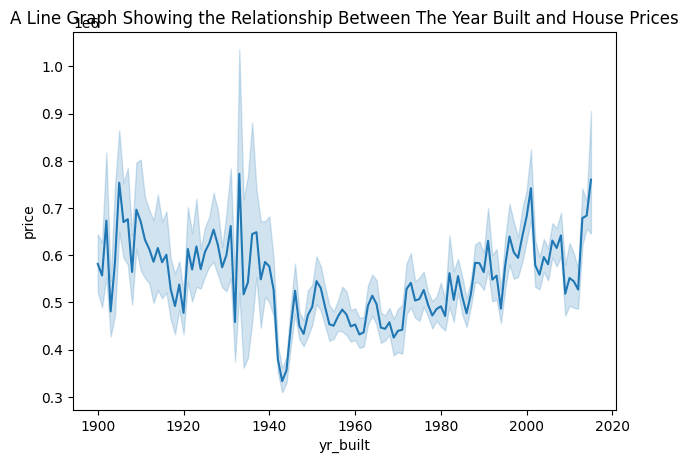

In [67]:
#Line graph showing relationship between price and year built
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(data=df, x="yr_built", y="price")
plt.title("A Line Graph Showing the Relationship Between The Year Built and House Prices")
plt.show()

The prices of the houses rises and falls depeding on the year it was built

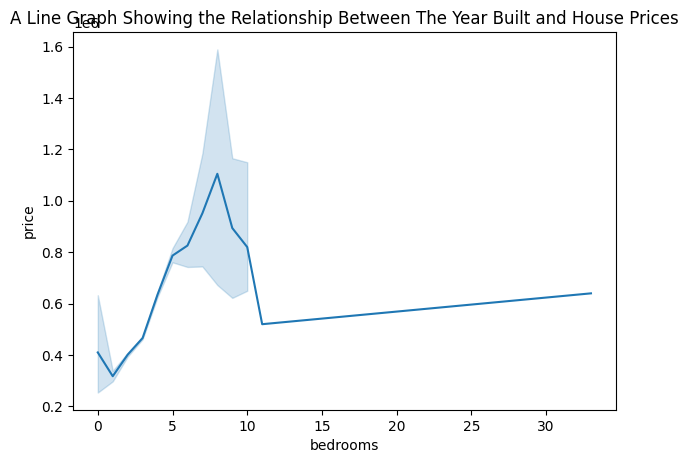

In [68]:
#Line graph showing relationship between price and number of bedrooms
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(data=df, x="bedrooms", y="price")
plt.title("A Line Graph Showing the Relationship Between The number of bedrooms and House Prices")
plt.show()

The price of the houses increases with an increase in the number of bedrooms

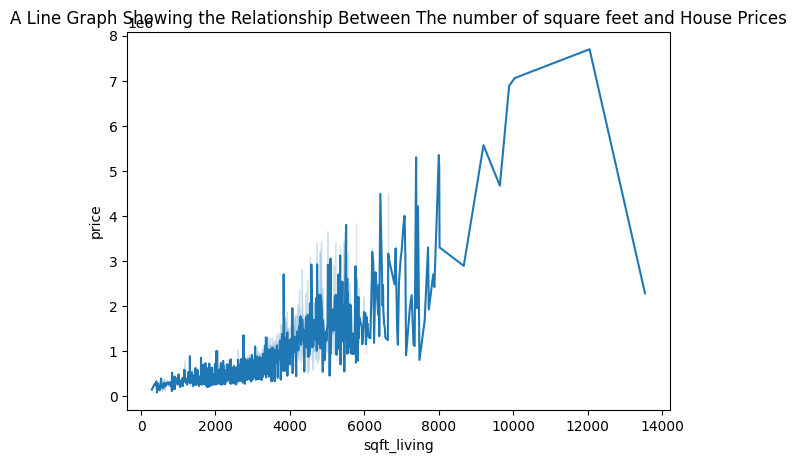

In [69]:
#Line graph showing relationship between price and number of bedrooms
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(data=df, x="sqft_living", y="price")
plt.title("A Line Graph Showing the Relationship Between The number of square feet and House Prices")
plt.show()

The price of the houses increases with an increase in square feet of the living room

<Figure size 2000x2000 with 0 Axes>

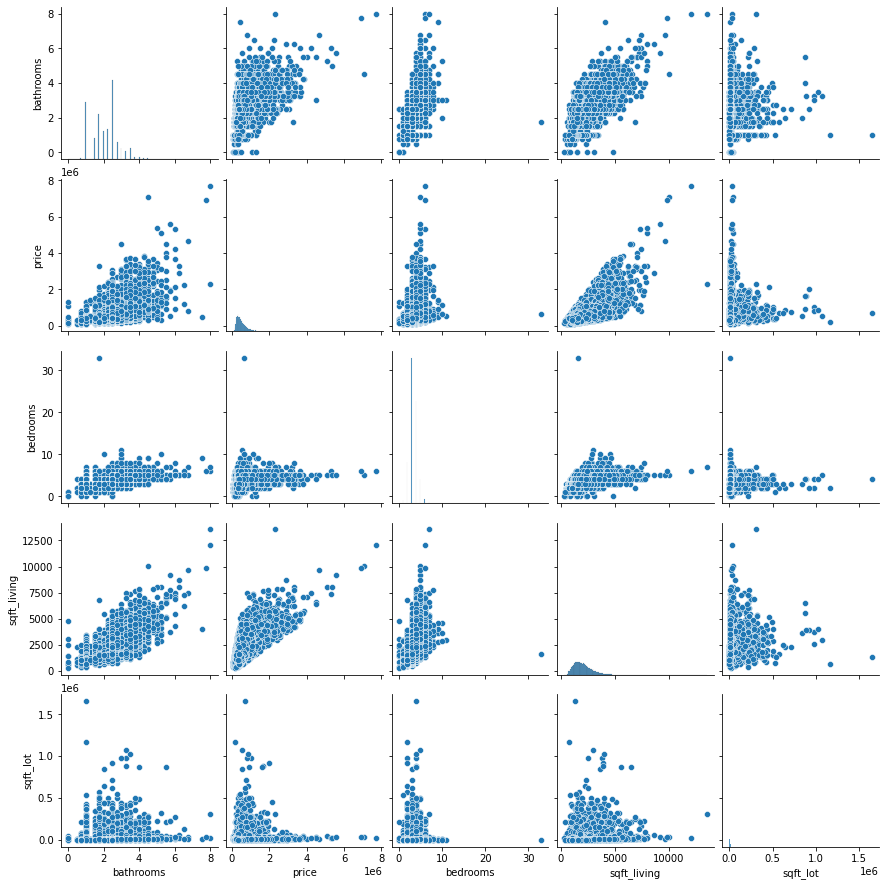

In [66]:
#Pairplot showing the relationship between the various colums
plt.figure(figsize = (20, 20), dpi=100)
y =['bathrooms', 'price', 'bedrooms', 'sqft_living', 'sqft_lot']
sns.pairplot(df[y])

In [70]:
# Asses correlation between our variables 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


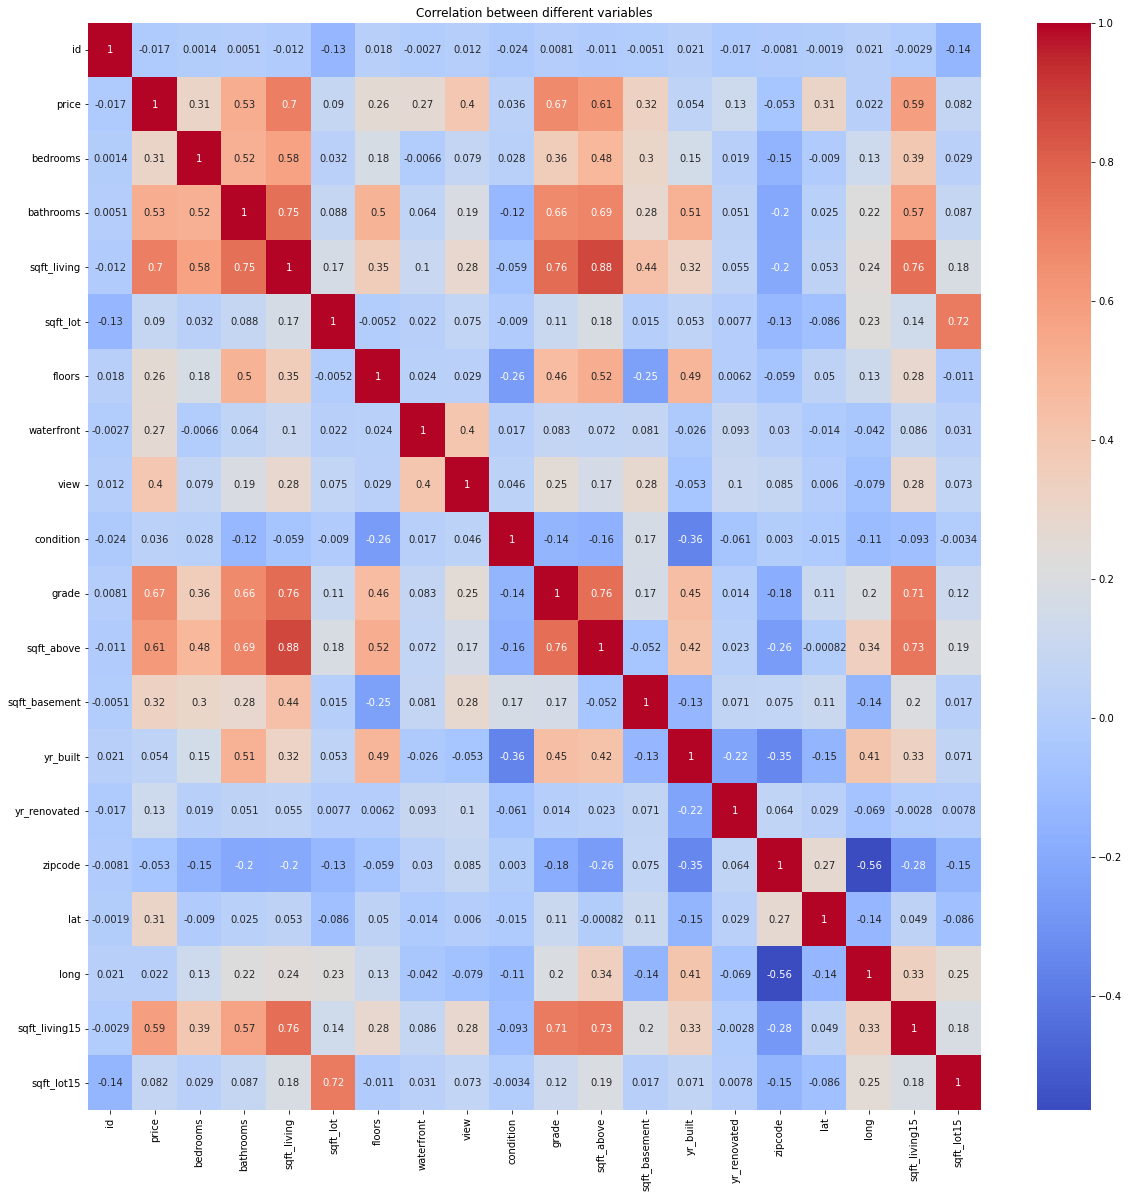

In [71]:

#Visualising the heatmap
fig, heat = plt.subplots(figsize = (20,20))
heat = sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between different variables')
plt.show()

There is a strong positive correlation between sqft_living and price

There is a weak negative correlation between condition and bathroom

There is a strong positive correlation between grade and sqft_above

## **Multivariate Analysis**

In [79]:
df['id']=df['id'].astype(int)

In [85]:
# separating our data into independent and dependent variables
X = df.drop('price', axis =1)
y = df['price']
# Let's view our independent variables
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [86]:
#viewing dependent variable
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

We use LDA since our data is labeled and we are performing supervised learning

In [87]:
# Create an instance of LDA and train the model
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,y)
lda_feat = X_lda.transform(X)

# Display the coefficients of the reducted colums
X_lda.coef_

array([[ 1.07301930e-08,  1.31053651e+02,  1.35496747e+02, ...,
        -4.13739931e+03,  7.93807771e-01,  6.60879222e-03],
       [ 1.01596789e-08,  1.32838045e+02,  1.39618738e+02, ...,
        -4.15757531e+03,  7.97384117e-01,  6.57596747e-03],
       [ 1.14739270e-08,  1.31025932e+02,  1.40230958e+02, ...,
        -4.13337810e+03,  7.94569461e-01,  6.57550754e-03],
       ...,
       [ 1.15565634e-08,  1.30297137e+02,  1.52384586e+02, ...,
        -4.18913147e+03,  7.94001739e-01,  6.60125159e-03],
       [ 1.16807870e-08,  1.29083003e+02,  1.39120831e+02, ...,
        -4.18018043e+03,  7.93512554e-01,  6.55955280e-03],
       [ 1.11722762e-08,  1.27749563e+02,  1.51016090e+02, ...,
        -4.18072687e+03,  7.90647226e-01,  6.53297419e-03]])

In [92]:
#a dataframe so that we can see the names of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending= False)

,0
lat,2.147122e+03
condition,2.681444e+02
bathrooms,1.354967e+02
bedrooms,1.310537e+02
zipcode,4.495178e+01
yr_built,2.271913e+01
grade,2.209004e+01
sqft_living15,7.938078e-01
sqft_above,3.416414e-01
sqft_living,1.388643e-01


**Price increase is directly proportional to;**




1. condition

2. bathrooms


3. bedrooms

4. zipcode	

5. yr_built

6. grade

7. sqft_living15

8. sqft_above

9. sqft_living

10. yr_renovated

11. sqft_lot15

12. sqft_lot




**Price increase is indirectly proportional to;**

1. sqft_basement

2. waterfront

3. view

4. floors

5. long	

# **Modelling**

In [100]:
#Using the positive variables which increase positively
X_positive = X[['sqft_lot',	'sqft_lot15',	'yr_renovated',	'sqft_living',	'sqft_above',	'sqft_basement', 'sqft_living15',	'waterfront',	'view',	'bathrooms']]

In [101]:
# Import libraries
from sklearn.model_selection import train_test_split
# Split our data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_positive, y, test_size = 0.2, random_state = 42)

In [108]:
# build the model
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
regressor = LinearRegression()
# fitting the training data
regressor = regressor.fit(X_train,y_train)
LinearRegression()
from sklearn import metrics
y_pred = regressor.predict(X_test)

In [123]:
#Looking at the outcome of the predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
4983,450000.0,615463.790957
10255,295000.0,510606.605774
4045,704300.0,435992.328682
21271,320000.0,348589.264291
10495,347500.0,476332.394020
...,...,...
8942,399900.0,692230.505999
11300,230000.0,197622.803209
21144,864327.0,922688.152298
2522,356500.0,657224.883857


In [124]:
print("Accuracy:", regressor.score(X_test, y_test))


Accuracy: 0.5673435431858774


In [125]:
# We will perform crossvalidation to see whether the model improves when subject to different train test combinations
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt


In [113]:
# define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# build multiple linear regression model
model = LinearRegression()

# use k-fold CV to evaluate model
scores = cross_val_score(model, X_positive, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
mean(absolute(scores))
print()

163533.4153164145

Mean Absolute error improves after cross validation

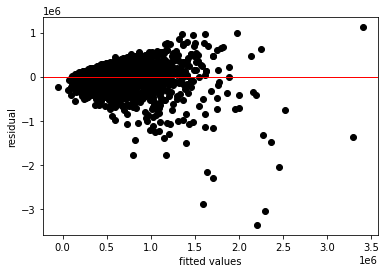

In [115]:
#Plot a residuals plot
y_predict = regressor.predict(X_test)
#
residuals = np.subtract(y_predict, y_test)
# Plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## **Multilinnear regression**

In [119]:
# we will create a new dataframe with both X and y variables
df1 = pd.concat([X_positive, df['price']], axis=1)
df1.head()

,sqft_lot,sqft_lot15,yr_renovated,sqft_living,sqft_above,sqft_basement,sqft_living15,waterfront,view,bathrooms,price
0,5650,5650,0,1180,1180,0,1340,0,0,1.00,221900.0
1,7242,7639,1991,2570,2170,400,1690,0,0,2.25,538000.0
2,10000,8062,0,770,770,0,2720,0,0,1.00,180000.0
3,5000,5000,0,1960,1050,910,1360,0,0,3.00,604000.0
4,8080,7503,0,1680,1680,0,1800,0,0,2.00,510000.0


In [127]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
model_1 = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df1)
res = model_1.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2890
Model:                       QuantReg   Bandwidth:                   2.999e+04
Method:                 Least Squares   Sparsity:                    4.568e+05
Date:                Thu, 03 Mar 2022   No. Observations:                21610
Time:                        15:57:13   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6459.7049   5448.879     -1.186      0.236   -1.71e+04    4220.500
sqft_lot          0.0430      0.054      0.794      0.427      -0.063       0.149
sqft_lot15       -0.5850      0.082     -7.092      0.000      -0.747      -0.423
yr_renovated     51.1713      3.912  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [130]:
# Load a summary of the upper quantile (0.75)
res1 = mod.fit(q=.75)
# Then print out the summary of our model
print(res1.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3649
Model:                       QuantReg   Bandwidth:                   2.690e+04
Method:                 Least Squares   Sparsity:                    5.909e+05
Date:                Thu, 03 Mar 2022   No. Observations:                21610
Time:                        15:59:24   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.256e+04   6414.877      9.752      0.000       5e+04    7.51e+04
sqft_lot          0.1134      0.070      1.632      0.103      -0.023       0.250
sqft_lot15       -0.8075      0.111     -7.243      0.000      -1.026      -0.589
yr_renovated     71.3259      4.429  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [131]:
# Load a summary of the lower quantile (0.25)
res2 = mod.fit(q=.25)
# Then print out the summary of our model
print(res2.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2250
Model:                       QuantReg   Bandwidth:                   2.677e+04
Method:                 Least Squares   Sparsity:                    4.150e+05
Date:                Thu, 03 Mar 2022   No. Observations:                21610
Time:                        15:59:30   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.993e+04   3979.734     -5.009      0.000   -2.77e+04   -1.21e+04
sqft_lot          0.0777      0.044      1.757      0.079      -0.009       0.164
sqft_lot15       -0.1602      0.064     -2.508      0.012      -0.285      -0.035
yr_renovated     33.6573      3.089  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


## **Ridge Regression**

In [133]:
# We will perform Ridge regression
#importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [134]:
#Build model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha': np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X_positive,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 0.01}


59462083118.87632

In [138]:
#Set our hyperparameters to the recommended values and run on the data
ridge = Ridge(normalize=True, alpha = 0.01)
ridge.fit(X_positive,y)
model_1 =(mean_squared_error(y_true=y,y_pred=ridge.predict(X_positive)))
print(model_1)
print("Accuracy:",ridge.score(X_test, y_test))

59007068471.31284
Accuracy: 0.568015629276629


The accuracy score is 56% and the mean squared error doesn't improve

## **Lasso Regression**

In [139]:
#importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")


In [140]:
# Set the alpha range
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5)))}
#Build the model
lasso = Lasso(normalize=True) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2', cv=10)

In [142]:
#Finding hyperparameters
gridlasso.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 4.5}
lasso score: 0.5675235817277989
lasso MSE: 61304202249.424545
lasso best estimator coef: [ 0.00000000e+00 -7.68063732e-01  6.18394529e+01  2.22766227e+02
  0.00000000e+00  1.93578434e+00  6.54880426e+01  5.69744661e+05
  7.22504667e+04  9.08283955e+02]


In [144]:
# We will set our hyperparameters to the recommended values and run on the data.
lasso = Lasso(normalize=True, alpha=4.5) 
lasso.fit(X_positive,y) 
first_model=(mean_squared_error(y_true=y,y_pred= lasso.predict(X_positive)))
print(first_model)
print(lasso.score(X_test, y_test))

59008458920.0677
0.5680998291466112


The mse improved and a 56% accuracy scorewas achieved

## **Elastic Net regression**

In [145]:
# Import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
# Build model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [149]:
# Fit the model
search.fit(X_positive,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


59473179278.08008

In [150]:
# We will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio= 0.8)
elastic.fit(X_positive,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X_positive)))
print(second_model)
print("Accuracy:",elastic.score(X_test, y_test))

59056387071.834114
Accuracy: 0.5673256038133236


The Mean squared Error improved but the accuracy is still prettylow, at 56%

# **Conclusion**

The models all have a similar accuracy to the base model of 56% 

The accuracy could improveif oother modelsare used to make predictions